In [79]:
%matplotlib notebook
%reset -f


import pandas as pd
import numpy as np
from scipy.stats import norm, probplot
import statsmodels.api as sm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn import preprocessing

### Função utilitária para fazer a regressão com constante adicionada
def regress(X,Y):
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
    results = model.fit()
    return results

In [80]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [81]:
# Fonte: 

df = pd.read_excel("jogo.xlsx")

In [82]:
deletar = df.loc[((df.Global_Sales.fillna(0)) == 0) & ((df.Total_Shipped.fillna(0)) == 0)]
a = deletar.index
dados = df.drop(a)

In [83]:
dados["Sales"] = dados["Global_Sales"].fillna(0) + dados["Total_Shipped"].fillna(0)

In [84]:


dados = dados.drop(columns = ["Global_Sales","Total_Shipped","url","status","img_url","NA_Sales" ,"PAL_Sales","JP_Sales" ,"Other_Sales","VGChartz_Score"])


In [85]:
dados = dados.fillna(0)

# Limpeza da Base de Dados
**Só vão ser usadas as linhas que possuem todas as informações relevantes para a regressão**

In [86]:
dados = dados.loc[((dados.Sales != 0 ) & (dados.Critic_Score != 0))]


# Análise Exploratória

0.26345550388471317

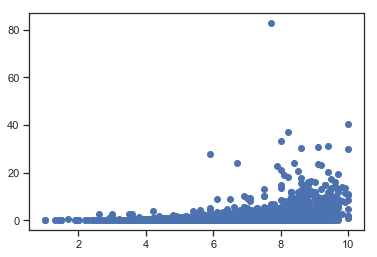

In [87]:
plt.scatter(dados.Critic_Score,dados.Sales);
dados.Critic_Score.corr(dados.Sales)

In [88]:
dados.Genre.values

array(['Sports', 'Platform', 'Racing', ..., 'Puzzle', 'Simulation',
       'Puzzle'], dtype=object)

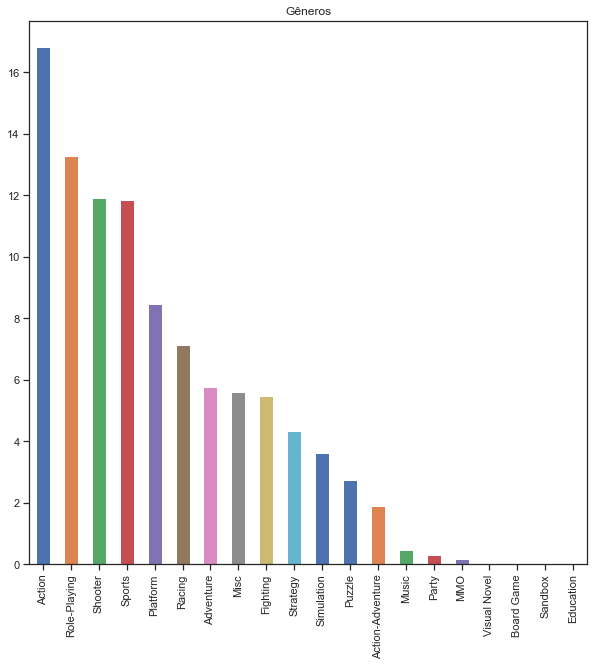

In [89]:
generos = dados.Genre.value_counts(True)*100
generos
plot = generos.plot(kind="bar",title="Gêneros",figsize = (10,10))

In [90]:
quantitativas = ['Rank', 'Critic_Score',
       'User_Score','Vgchartzscore','Sales','Year']

In [91]:
dados.Genre = dados.Genre.astype('category')
dados.ESRB_Rating = dados.ESRB_Rating.astype('category')
dados.Platform = dados.Platform.astype('category')
dados.Publisher = dados.Publisher.astype('category')
dados.Developer = dados.Developer.astype('category')


In [92]:
data = dados.loc[:,quantitativas]

In [93]:
x_vars = ['Critic_Score',
       'User_Score','Vgchartzscore','Sales']
y_vars = x_vars

In [94]:
sns.set(style="ticks")

#sns.pairplot(dados, hue="Genre", x_vars=x_vars, y_vars=y_vars);

In [95]:
#sns.pairplot(dados, hue="Genre", kind="reg", x_vars=x_vars, y_vars=y_vars);

# Separação das variaveis e primeiras regressões lineares

In [96]:
qualitativas = ['Genre', 'ESRB_Rating', 'Platform',
       'Publisher', 'Developer']
quantitativas = ['Rank', 'Critic_Score',
       'User_Score','Vgchartzscore','Sales','Year']

**Regressão para Cópias Vendidas**

In [97]:
# Separaremos as preditoras
quant_sales = quantitativas.copy()
quant_sales.remove('Sales')
np.asarray(dados);

In [98]:
results_quantitativas_sales = regress(((dados.loc[:, quant_sales]).fillna(0)).astype(float), dados.Sales)

In [99]:
results_quantitativas_sales.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.203
Model:                            OLS   Adj. R-squared:                  0.202
Method:                 Least Squares   F-statistic:                     239.6
Date:                Tue, 19 Nov 2019   Prob (F-statistic):          1.54e-228
Time:                        08:43:13   Log-Likelihood:                -10917.
No. Observations:                4706   AIC:                         2.185e+04
Df Residuals:                    4700   BIC:                         2.189e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            44.5031     14.775      3.012      0.003      15.537      73.469
Rank             -0.0002   7.47e-06    -25.517      0.000      -0.000      -0.000
Critic_Score      0.2127      0.028      7.733      0.000       0.159       0.267
User_Score        0.1824      0.021      8.512      0.000       0.140       0.224
Vgchartzscore     0.0142      0.017      0.858      0.391      -0.018       0.047
Year             -0.0218      0.007     -2.959      0.003      -0.036      -0.007
==============================================================================
Omnibus:                     8318.744   Durbin-Watson:                   0.136
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         16246453.025
Skew:                          12.285   Prob(JB):                         0.00
Kurtosis:                     289.795   Cond. No.                     3.53e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.53e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [100]:
quant_sales2 = quant_sales.copy()
quant_sales2.remove('Vgchartzscore')

In [101]:
results_quantitativas_sales_2 = regress(((dados.loc[:, quant_sales2]).fillna(0)).astype(float), dados.Sales)

In [102]:
results_quantitativas_sales_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.203
Model:                            OLS   Adj. R-squared:                  0.202
Method:                 Least Squares   F-statistic:                     299.3
Date:                Tue, 19 Nov 2019   Prob (F-statistic):          1.20e-229
Time:                        08:43:13   Log-Likelihood:                -10918.
No. Observations:                4706   AIC:                         2.185e+04
Df Residuals:                    4701   BIC:                         2.188e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           43.0302     14.675      2.932      0.003      14.261      71.800
Rank            -0.0002   7.45e-06    -25.655      0.000      -0.000      -0.000
Critic_Score     0.2148      0.027      7.838      0.000       0.161       0.269
User_Score       0.1874      0.021      9.088      0.000       0.147       0.228
Year            -0.0210      0.007     -2.879      0.004      -0.035      -0.007
==============================================================================
Omnibus:                     8318.423   Durbin-Watson:                   0.136
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         16231351.288
Skew:                          12.285   Prob(JB):                         0.00
Kurtosis:                     289.660   Cond. No.                     3.50e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.5e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Regressão para Nota dos críticos**

In [103]:
quant_score = quantitativas.copy()
quant_score.remove('Critic_Score')


In [104]:
results_quantitativas_score = regress(((dados.loc[:, quant_score]).fillna(0)).astype(float), dados.Critic_Score)
results_quantitativas_score.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Critic_Score   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.166
Method:                 Least Squares   F-statistic:                     187.8
Date:                Tue, 19 Nov 2019   Prob (F-statistic):          8.11e-183
Time:                        08:43:13   Log-Likelihood:                -7901.9
No. Observations:                4706   AIC:                         1.582e+04
Df Residuals:                    4700   BIC:                         1.585e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            27.2798      7.782      3.505      0.000      12.023      42.537
Rank          -8.382e-05   4.02e-06    -20.849      0.000   -9.17e-05   -7.59e-05
User_Score        0.0444      0.011      3.908      0.000       0.022       0.067
Vgchartzscore     0.0511      0.009      5.858      0.000       0.034       0.068
Sales             0.0591      0.008      7.733      0.000       0.044       0.074
Year             -0.0098      0.004     -2.517      0.012      -0.017      -0.002
==============================================================================
Omnibus:                      512.828   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              733.742
Skew:                          -0.836   Prob(JB):                    4.68e-160
Kurtosis:                       3.971   Cond. No.                     3.53e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.53e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Regressão com Dummy para quantidade de cópias vendidas

In [105]:
def dummify(data, column_name):
    """
        Converte a coluna column_name em dummies / one-hot e as adiciona ao dataframe
        retorna uma copia do  df original *sem* a coluna que foi dummified
    """
    df = data.copy()
    # Nota: se você for um econometrista, pode se interessar por usar a opção dropFirst = True na get_dummies
    df2 = pd.concat([df.drop(column_name, axis=1), pd.get_dummies(data[column_name], prefix=column_name)], axis=1)
    return df2

In [106]:
res = dummify(dados, ['Genre', 'ESRB_Rating', 'Platform',
       'Publisher', 'Developer'])


In [107]:
z = res.drop(columns=quantitativas)


In [108]:
quant_sales2.extend(z)
quant_sales2.remove("Rank")
quant_sales2.remove("Name")
quant_sales2.remove("basename")
quant_sales2.remove("Last_Update")

In [109]:
dummy_sales = regress(((res.loc[:,quant_sales2]).fillna(0)).astype(float), res.Sales)

In [110]:
dummy_sales.summary();


In [111]:
valorp = dummy_sales.pvalues
deixar = []
pcrit = 0.10
for indice,valor in valorp.items():
    if valor <= pcrit:
        deixar.append(indice)
del(deixar[0])

In [112]:
params_sales_1 = quant_sales.copy()
params_sales_1.remove('Vgchartzscore')

In [113]:
params_sales_1.extend(deixar)
dummy_sales2 = regress(((res.loc[:,params_sales_1]).fillna(0)).astype(float), res.Sales)


In [114]:
dummy_sales2.summary();

In [115]:
valorp2 = dummy_sales2.pvalues
deixar2 = []
pcrit = 0.10
for indice,valor in valorp2.items():
    if valor <= pcrit:
        deixar2.append(indice)
del(deixar2[0])


In [116]:
params_sales_2 = quant_sales.copy()
params_sales_2.remove('Vgchartzscore')
params_sales_2.extend(deixar2)

In [117]:

dummy_sales3 = regress(((res.loc[:,params_sales_2]).fillna(0)).astype(float), res.Sales)

In [118]:
dummy_sales3.summary();

In [119]:
valorp3 = dummy_sales3.pvalues
deixar3 = []
pcrit = 0.10
for indice,valor in valorp3.items():
    if valor <= pcrit:
        deixar3.append(indice)
del(deixar3[0])


In [120]:
params_sales_3 = quant_sales.copy()
params_sales_3.remove('Vgchartzscore')
params_sales_3.extend(deixar3)

In [121]:
dummy_sales4 = regress(((res.loc[:,params_sales_3]).fillna(0)).astype(float), res.Sales)

In [122]:
dummy_sales4.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.480
Method:                 Least Squares   F-statistic:                     87.73
Date:                Tue, 19 Nov 2019   Prob (F-statistic):               0.00
Time:                        08:43:17   Log-Likelihood:                -9889.5
No. Observations:                4706   AIC:                         1.988e+04
Df Residuals:                    4655   BIC:                         2.021e+04
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       39.9602     13.102      3.050      0.002      14.274      65.646
Rank                                     -6.905e-05    3.1e-06    -22.287      0.000   -7.51e-05    -6.3e-05
Critic_Score                                 0.0281      0.006      4.966      0.000       0.017       0.039
User_Score                                   0.0342      0.004      8.071      0.000       0.026       0.042
Year                                        -0.0195      0.007     -2.990      0.003      -0.032      -0.007
Critic_Score                                 0.0281      0.006      4.966      0.000       0.017       0.039
User_Score                                   0.0342      0.004      8.071      0.000       0.026       0.042
Rank                                     -6.905e-05    3.1e-06    -22.287      0.000   -7.51e-05    -6.3e-05
Critic_Score                                 0.0281      0.006      4.966      0.000       0.017       0.039
User_Score                                   0.0342      0.004      8.071      0.000       0.026       0.042
Critic_Score                                 0.0281      0.006      4.966      0.000       0.017       0.039
User_Score                                   0.0342      0.004      8.071      0.000       0.026       0.042
Platform_DS                                  0.2532      0.118      2.149      0.032       0.022       0.484
Platform_GB                                  4.4806      0.598      7.498      0.000       3.309       5.652
Platform_NES                                19.2305      1.528     12.583      0.000      16.234      22.227
Platform_PS2                                 0.2663      0.113      2.365      0.018       0.046       0.487
Platform_PS4                                 1.2980      0.228      5.686      0.000       0.850       1.745
Platform_SNES                                1.3912      0.501      2.778      0.005       0.409       2.373
Platform_Wii                                 0.4675      0.115      4.063      0.000       0.242       0.693
Publisher_Broderbund                         1.9887      0.996      1.996      0.046       0.036       3.942
Publisher_Chucklefish                        3.2753      1.991      1.645      0.100      -0.629       7.179
Publisher_Edmund McMillen                    2.7609      0.995      2.774      0.006       0.810       4.712
Publisher_Facepunch Studios                  3.9403      0.996      3.956      0.000       1.988       5.893
Publisher_RedOctane                          1.6723      0.755      2.216      0.027       0.193       3.152
Publisher_SCS Software                       2.1769      0.995      2.187      0.029       0.226       4.128
Publisher_Sony Interactive Ente

# Regressão com Dummy para Nota do jogo

In [123]:
dummy_score = quant_score.copy()
dummy_score.extend(z)
dummy_score.remove("Rank")
dummy_score.remove("Name")
dummy_score.remove("basename")
dummy_score.remove("Last_Update")


In [124]:
results_dummy_score = regress(((res.loc[:,dummy_score]).fillna(0)).astype(float), res.Critic_Score)
results_dummy_score.summary();

In [125]:
valorp_2 = results_dummy_score.pvalues
deixar_2 = []
pcrit = 0.10
for indice,valor in valorp_2.items():
    if valor <= pcrit:
        deixar_2.append(indice)
del(deixar_2[0])

In [126]:
quant_score2 = quant_score.copy()
quant_score2.remove('Vgchartzscore')

quant_score2.extend(deixar_2)

In [127]:
dummy_score_2 = regress(((res.loc[:,quant_score2]).fillna(0)).astype(float), res.Critic_Score)
dummy_score_2.summary();

In [128]:
valorp_3 = dummy_score_2.pvalues
deixar_3 = []
pcrit = 0.10
for indice,valor in valorp_3.items():
    if valor <= pcrit:
        deixar_3.append(indice)
del(deixar_3[0])

quant_sales3 = quant_score.copy()
quant_sales3.remove('Vgchartzscore')

quant_sales3.extend(deixar_3)

In [129]:
dummy_score_3 = regress(((res.loc[:,quant_sales3]).fillna(0)).astype(float), res.Critic_Score)
dummy_score_3.summary();

In [130]:
valorp_4 = dummy_score_3.pvalues
deixar_4 = []
pcrit = 0.10
for indice,valor in valorp_4.items():
    if valor <= pcrit:
        deixar_4.append(indice)
del(deixar_4[0])

quant_sales4 = quant_score.copy()
quant_sales4.remove('Vgchartzscore')

quant_sales4.extend(deixar_4)

In [131]:
dummy_score_4 = regress(((res.loc[:,quant_sales4]).fillna(0)).astype(float), res.Critic_Score)
dummy_score_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Critic_Score   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     13.37
Date:                Tue, 19 Nov 2019   Prob (F-statistic):               0.00
Time:                        08:43:21   Log-Likelihood:                -6598.6
No. Observations:                4706   AIC:                         1.391e+04
Df Residuals:                    4351   BIC:                         1.620e+04
Df Model:                         354                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                                59.1180      6.556      9.018      0.000      46.266      71.970
Rank                                              -2.064e-05   1.19e-06    -17.375      0.000    -2.3e-05   -1.83e-05
User_Score                                            0.0059      0.002      2.482      0.013       0.001       0.011
Sales                                                 0.0109      0.002      6.749      0.000       0.008       0.014
Year                                                 -0.0078      0.001     -8.234      0.000      -0.010      -0.006
Rank                                              -2.064e-05   1.19e-06    -17.373      0.000    -2.3e-05   -1.83e-05
User_Score                                            0.0059      0.002      2.482      0.013       0.001       0.011
Sales                                                 0.0109      0.002      6.749      0.000       0.008       0.014
Year                                                 -0.0078      0.001     -8.234      0.000      -0.010      -0.006
Rank                                              -2.064e-05   1.19e-06    -17.373      0.000    -2.3e-05   -1.83e-05
User_Score                                            0.0059      0.002      2.482      0.013       0.001       0.011
Sales                                                 0.0109      0.002      6.749      0.000       0.008       0.014
Year                                                 -0.0078      0.001     -8.234      0.000      -0.010      -0.006
User_Score                                            0.0059      0.002      2.482      0.013       0.001       0.011
Vgchartzscore                                         0.0367      0.007      5.030      0.000       0.022       0.051
Sales                                                 0.0109      0.002      6.749      0.000       0.008       0.014
Year                                                 -0.0078      0.001     -8.234      0.000      -0.010      -0.006
Genre_Action                                          1.0056      0.274      3.664      0.000       0.468       1.544
Genre_Action-Adventure                                1.7761      0.295      6.027      0.000       1.198       2.354
Genre_Adventure                                       1.3314      0.278      4.785      0.000       0.786       1.877
Genre_Education                                       2.1156      1.058      2.000      0.046       0.041       4.190
Genre_Fighting                                        1.4019      0.281      4.988      0.000       0.851       1.953
Genre_MMO                                             1.4421      0.450      3.204      0.001       0.560       2.325
Genre_Misc     